<a href="https://colab.research.google.com/github/denniesbor/phys513/blob/main/Phys513_H4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phys 513
## Dennies Bor

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Laplace's equation in 1-D cylindrical coordinates:
$$\frac{1}{r} \frac{d}{dr}\left(r \frac{du}{dr}\right) = 0$$
where $u$ is the function we're solving for, and $r$ is the radial coordinate.
Expanding this equation:
$$\frac{1}{r} \left(\frac{du}{dr} + r \frac{d^2u}{dr^2}\right) = 0$$
Multiply both sides by $r$:
$$\frac{du}{dr} + r \frac{d^2u}{dr^2} = 0$$
Discretize the domain using a uniform grid with $N$ points, where $r_i = i\Delta r$ for $i = 0, 1, ..., N-1$.
Approximate the derivatives using central differences:
$$\frac{du}{dr} \approx \frac{u_{i+1} - u_{i-1}}{2\Delta r}$$
$$\frac{d^2u}{dr^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{(\Delta r)^2}$$
Substitute these into our equation:
$$\frac{u_{i+1} - u_{i-1}}{2\Delta r} + r_i \frac{u_{i+1} - 2u_i + u_{i-1}}{(\Delta r)^2} = 0$$
Multiply by $(\Delta r)^2$:
$$\frac{\Delta r}{2} (u_{i+1} - u_{i-1}) + r_i (u_{i+1} - 2u_i + u_{i-1}) = 0$$
Rearrange terms:
$$(r_i + \frac{\Delta r}{2}) u_{i+1} + (r_i - \frac{\Delta r}{2}) u_{i-1} - 2r_i u_i = 0$$
This gives us our numerical scheme. For each interior point $i$ ($i = 1, ..., N-2$), we have:
$$u_i = \frac{(r_i + \frac{\Delta r}{2}) u_{i+1} + (r_i - \frac{\Delta r}{2}) u_{i-1}}{2r_i}$$``


In [9]:

def solve_laplace_1d_cylindrical_specific():
    # grid points
    r = np.array([1.0, 1.5, 2.0])
    dr = (r[-1] - r[0]) / (len(r) - 1)

    # boundary conditions
    Φ = np.zeros(3)
    Φ[0] = 0  # Φ(r=1) = 0
    Φ[2] = 1  # Φ(r=2) = 1

    # We only need to solve for Φ[1] (r=1.5)

    r_i = 1.5
    Φ[1] = ((r_i + dr/2) * Φ[2] + (r_i - dr/2) * Φ[0]) / (2 * r_i)

    return r, Φ

# Solve the equation
r, Φ = solve_laplace_1d_cylindrical_specific()

# Print the results
print("Results:")
for i in range(3):
    print(f"r = {r[i]:.1f}, Φ = {Φ[i]:.6f}")

print(f"\nThe potential at r = 1.5 is Φ = {Φ[1]:.6f}")

Results:
r = 1.0, Φ = 0.000000
r = 1.5, Φ = 0.583333
r = 2.0, Φ = 1.000000

The potential at r = 1.5 is Φ = 0.583333


In [8]:
def solve_laplace_1d_cylindrical_specific():
    # Define the grid points
    r = np.array([1.0, 4/3, 5/3, 2.0])
    dr = (r[-1] - r[0]) / (len(r) - 1)

    # Initialize potential Φ with boundary conditions
    Φ = np.zeros(4)
    Φ[0] = 0  # Φ(r=1) = 0
    Φ[-1] = 1  # Φ(r=2) = 1

    iterations = 1000
    threshold = 1e-6
    for _ in range(iterations):
        phi_old = Φ.copy()
        for i in range(1, 3):
            Φ[i] = ((r[i] + dr/2) * Φ[i+1] + (r[i] - dr/2) * Φ[i-1]) / (2 * r[i])

        if np.max(np.abs(Φ - phi_old)) < threshold:
            break

    # Calculate Φ at r = 1.5 using the same formula
    r_1_5 = 1.5
    Φ_1_5 = ((r_1_5 + dr/2) * Φ[2] + (r_1_5 - dr/2) * Φ[1]) / (2 * r_1_5)

    return r, Φ, Φ_1_5

# Solve the equation
r, Φ, Φ_1_5 = solve_laplace_1d_cylindrical_specific()

# Print the results
print("Results:")
for i in range(len(r)):
    print(f"r = {r[i]:.6f}, Φ = {Φ[i]:.6f}")

print(f"\nThe potential at r = 1.5 is Φ = {Φ_1_5:.6f}")

Results:
r = 1.000000, Φ = 0.000000
r = 1.333333, Φ = 0.414226
r = 1.666667, Φ = 0.736402
r = 2.000000, Φ = 1.000000

The potential at r = 1.5 is Φ = 0.593212


#Question 4.2
For spherical and symmetric problem,  the Laplace equation $∇²Φ = 0 $ becomes:

$$ \frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{\Phi}{dr}\right) = 0$$

Integrating this twice gives:
$$Φ(r) = -A/r + B$$
where A and B are constants.

In the region $a \leq r \leq r_o$, the potential $\Phi_1(r)$ satisfies the Laplace equation $\nabla^2 \Phi_1 = 0$.

Using the boundary condition $\Phi(a) = 0$:
$$-\frac{A}{a} + B = 0 \quad \Rightarrow \quad B = \frac{A}{a}.$$
Thus, the potential in the inner region becomes:
$$\Phi_1(r) = A \left( \frac{1}{a} - \frac{1}{r} \right).$$

Potential in the Region Between $r_o$ and $b$ (Outer Region)
In the region $r_o \leq r \leq b$, the potential $\Phi_2(r)$ also satisfies $\nabla^2 \Phi_2 = 0$, and the general solution is:
$$\Phi_2(r) = -\frac{C}{r} + D.$$
Using the boundary condition $\Phi(b) = 0$:
$$-\frac{C}{b} + D = 0 \quad \Rightarrow \quad D = \frac{C}{b}.$$
Thus, the potential in the outer region becomes:
$$\Phi_2(r) = C \left( \frac{1}{b} - \frac{1}{r} \right).$$

Continuity of Potential at $r = r_o$
The potential must be continuous across the surface at $r_o$, so we have:
$$\Phi_1(r_o) = \Phi_2(r_o).$$
Substitute the expressions for $\Phi_1$ and $\Phi_2$ at $r = r_o$:
$$A \left( \frac{1}{a} - \frac{1}{r_o} \right) = C \left( \frac{1}{b} - \frac{1}{r_o} \right).$$
From this, we can solve for $C$ in terms of $A$:
$$C = A \frac{\left( \frac{1}{a} - \frac{1}{r_o} \right)}{\left( \frac{1}{b} - \frac{1}{r_o} \right)}.$$

Discontinuity of Electric Field at $r = r_o$
The electric field $E = -\frac{d\Phi}{dr}$ must satisfy the discontinuity condition at $r = r_o$ due to the surface charge density $\sigma_0$:
$$E_2(r_o^+) - E_1(r_o^-) = \frac{\sigma_0}{\epsilon_0}.$$
Calculating the electric field in both regions:
$$E_1(r) = -\frac{d}{dr} \left( A \left( \frac{1}{a} - \frac{1}{r} \right) \right) = \frac{A}{r^2},$$
$$E_2(r) = -\frac{d}{dr} \left( C \left( \frac{1}{b} - \frac{1}{r} \right) \right) = \frac{C}{r^2}.$$
At $r = r_o$, the condition becomes:
$$\frac{C}{r_o^2} - \frac{A}{r_o^2} = \frac{\sigma_0}{\epsilon_0}.$$
Simplifying this:
$$C - A = \frac{\sigma_0 r_o^2}{\epsilon_0}.$$
Substitute $C = A \frac{\left( \frac{1}{a} - \frac{1}{r_o} \right)}{\left( \frac{1}{b} - \frac{1}{r_o} \right)}$ into the equation:
$$A \left( \frac{\left( \frac{1}{a} - \frac{1}{r_o} \right)}{\left( \frac{1}{b} - \frac{1}{r_o} \right)} - 1 \right) = \frac{\sigma_0 r_o^2}{\epsilon_0}.$$
Factoring out $A$:
$$A \left( \frac{\left( \frac{1}{a} - \frac{1}{b} \right)}{\left( \frac{1}{b} - \frac{1}{r_o} \right)} \right) = \frac{\sigma_0 r_o^2}{\epsilon_0}.$$
Solve for $A$:
$$A = \frac{\sigma_0 r_o a (r_o - b)}{\epsilon_0 (b-a)}.$$

Potential $\Phi(r)$

Now that we have $A$ and $C$, the potential in both regions is:
For $a \leq r \leq r_o$:
$$\Phi_1(r) = \frac{\sigma_0 r_o a (r_o - b)}{\epsilon_0 (b-a)} \left( \frac{1}{a} - \frac{1}{r} \right)$$
For $r_o \leq r \leq b$:
$$\Phi_2(r) = \frac{\sigma_0 r_o a (r_o - b)}{\epsilon_0 (b-a)} \cdot \frac{\left( \frac{1}{a} - \frac{1}{r_o} \right)}{\left( \frac{1}{b} - \frac{1}{r_o} \right)} \left( \frac{1}{b} - \frac{1}{r} \right)$$

Charge on the Conductors

The total charge on the inner conductor (at $r = a$) can be found using Gauss's law:
$$Q_{\text{inner}} = 4 \pi a^2 \epsilon_0 E_1(r=a) = 4 \pi a^2 \epsilon_0 \frac{A}{a^2} = 4 \pi \epsilon_0 A = \frac{4 \pi \sigma_0 r_o a (r_o - b)}{b-a}.$$
The total charge on the outer conductor (at $r = b$) is the negative of the charge on the inner conductor to maintain zero total charge:
$$Q_{\text{outer}} = -Q_{\text{inner}} = -\frac{4 \pi \sigma_0 r_o a (r_o - b)}{b-a}.$$

# Question 4.3

The electric field $ E^+(y) $ is given by:

- **Outside the slab:**
$$
  E = \frac{\rho_0 t}{2\varepsilon_0}
$$

- **Inside the slab:**
$$
  E = \frac{\rho_0 y}{\varepsilon_0}
$$

Thus, for $ E^+(y) $ versus $ y $, we have:

$$
E^+(y) =
\begin{cases}
-\frac{\rho_0 t}{2\varepsilon_0}, & y < 0 \\
\frac{\rho_0 y}{\varepsilon_0}, & 0 < y < t \\
\frac{\rho_0 t}{2\varepsilon_0}, & y > t
\end{cases}
$$

## 2. Electric Field $ E^-(y) $ for Negative Charge Density Shifted by $ -\delta $

For a slab with charge density $ -\rho_0 $, shifted by $ -\delta $, the electric field $ E^-(y) $ is given by:

$$
E^-(y) =
\begin{cases}
\frac{\rho_0 t}{2\varepsilon_0}, & y < -\delta \\
-\frac{\rho_0 (y + \delta)}{\varepsilon_0}, & -\delta < y < t - \delta \\
-\frac{\rho_0 t}{2\varepsilon_0}, & y > t - \delta
\end{cases}
$$

## 3. Combined Electric Field $ E^+(y) + E^-(y) $

Now, combining $ E^+(y) $ and $ E^-(y) $, we get:

$$
E^+(y) + E^-(y) =
\begin{cases}
0, & y < -\delta \\
\frac{\rho_0 t}{2\varepsilon_0} + \frac{\rho_0 (y + \delta)}{\varepsilon_0}, & -\delta < y < 0 \\
\frac{\rho_0 (2y + \delta)}{\varepsilon_0}, & 0 < y < t - \delta \\
\frac{\rho_0 y}{\varepsilon_0} - \frac{\rho_0 t}{2\varepsilon_0}, & t - \delta < y < t \\
0, & y > t
\end{cases}
$$


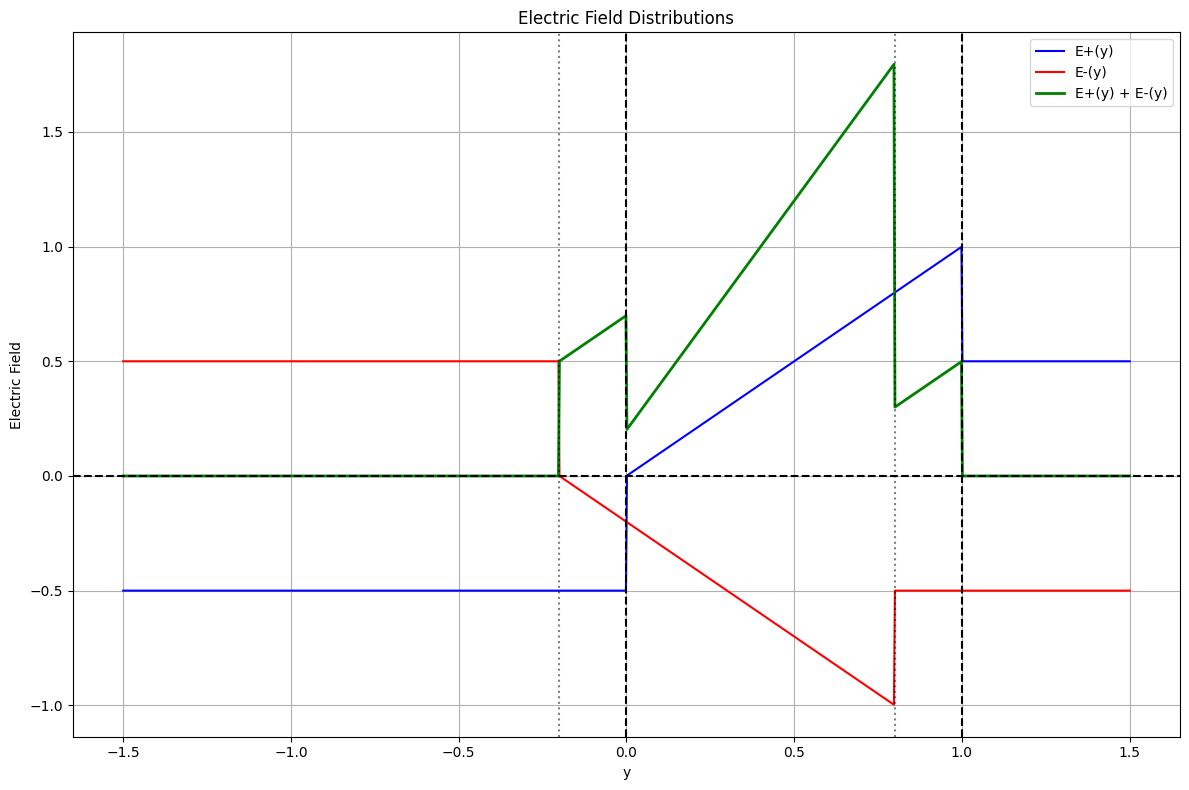

In [11]:
# Python sketch with dummu variables
# Constants
rho0 = 1  # Charge density
t = 1     # Thickness of slab
epsilon0 = 1  # Permittivity of free space
delta = 0.2 * t  # Small distance for shift

# Create y values
y = np.linspace(-1.5*t, 1.5*t, 1000)

# Define E+ function
def E_plus(y):
    return np.piecewise(y,
                        [y < 0, (y >= 0) & (y <= t), y > t],
                        [-rho0*t/(2*epsilon0),
                         lambda y: rho0*y/epsilon0,
                         rho0*t/(2*epsilon0)])

# Define E- function
def E_minus(y):
    return np.piecewise(y,
                        [y < -delta, (y >= -delta) & (y <= t-delta), y > t-delta],
                        [rho0*t/(2*epsilon0),
                         lambda y: -rho0*(y+delta)/epsilon0,
                         -rho0*t/(2*epsilon0)])

# Define E+ + E- function
def E_total(y):
    return np.piecewise(y,
                        [y < -delta,
                         (y >= -delta) & (y < 0),
                         (y >= 0) & (y <= t-delta),
                         (y > t-delta) & (y < t),
                         y >= t],
                        [0,
                         lambda y: rho0*t/(2*epsilon0) + rho0*(y+delta)/epsilon0,
                         lambda y: rho0*(2*y+delta)/epsilon0,
                         lambda y: rho0*y/epsilon0 - rho0*t/(2*epsilon0),
                         0])

# Create the plot
plt.figure(figsize=(12, 8))

plt.plot(y, E_plus(y), label='E+(y)', color='blue')
plt.plot(y, E_minus(y), label='E-(y)', color='red')
plt.plot(y, E_total(y), label='E+(y) + E-(y)', color='green', linewidth=2)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=t, color='k', linestyle='--')
plt.axvline(x=-delta, color='k', linestyle=':', alpha=0.5)
plt.axvline(x=t-delta, color='k', linestyle=':', alpha=0.5)

plt.xlabel('y')
plt.ylabel('Electric Field')
plt.title('Electric Field Distributions')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Question 4.4
For a polarized object, the bound surface charge density $ \sigma_b $ and the bound volume charge density $ \rho_b $ are given by:

**Surface Charge Density:**
$$
\sigma_b = \mathbf{P} \cdot \hat{\mathbf{n}}
$$
where $ \mathbf{P} $ is the polarization vector and $ \hat{\mathbf{n}} $ is the unit normal vector at the surface.

**Volume Charge Density:**
$$
\rho_b = -\nabla \cdot \mathbf{P}
$$

The polarization vector is given as:
$$
\mathbf{P} = P_o \hat{\mathbf{s}}
$$
where $ \hat{\mathbf{s}} $ is the unit vector in the cylindrical radial direction.

At the surface of the cylinder (at radius $ s = a $):
$$
\hat{\mathbf{n}} = \hat{\mathbf{s}}
$$
Thus, we can compute $ \sigma_b $:
$$
\sigma_b = \mathbf{P} \cdot \hat{\mathbf{n}} = P_o \hat{\mathbf{s}} \cdot \hat{\mathbf{s}} = P_o
$$
So, the bound surface charge density is:
$$
\sigma_b = P_o
$$

In cylindrical coordinates, the divergence is computed as:
$$
\nabla \cdot \mathbf{P} = \frac{1}{s} \frac{\partial}{\partial s}(s P_s) + \frac{1}{s} \frac{\partial P_\phi}{\partial \phi} + \frac{\partial P_z}{\partial z}
$$
Since:
- $ P_s = P_o $ (constant),
- $ P_\phi = 0 $,
- $ P_z = 0 $,

The divergence simplifies to:
$$
\nabla \cdot \mathbf{P} = \frac{1}{s} \frac{\partial}{\partial s}(s P_o) = \frac{P_o}{s}
$$
Now, we can compute $ \rho_b $:
$$
\rho_b = -\nabla \cdot \mathbf{P} = -\frac{P_o}{s}
$$

2. **Total Bound Charge**

The total bound charge is the sum of the surface and volume charge densities integrated over the relevant regions.

$$
Q_{surface} = \sigma_b \cdot A = P_o \cdot (2\pi a L) = 2\pi a L P_o
$$

For the volume charge, we integrate $ \rho_b $ over the volume of the cylinder:
$$
Q_{volume} = \int_0^L \int_0^a \rho_b (2\pi s) ds dz
$$
Substituting $ \rho_b = -\frac{P_o}{s} $:
$$
Q_{volume} = \int_0^L \int_0^a -\frac{P_o}{s} (2\pi s) ds dz = -2\pi P_o \int_0^L dz \int_0^a ds = -2\pi L P_o a
$$
Total charge then becomes
$$
Q_{total} = Q_{surface} + Q_{volume} = (2\pi a L P_o) + (-2\pi L P_o a) = 0
$$


3. **Finding the Electric Field $ E_b(s)**


Using Gauss's law, we find the electric field due to the bound charges.

Inside the cylinder
$$
E_b(s) (2\pi s L) = \frac{Q_{enclosed}}{\varepsilon_0} = 0 \quad \Rightarrow \quad E_b(s) = 0 \quad \text{for } s < a
$$

Outside the cylinder

The enclosed charge for $ s > a $ includes the surface charge:
$$
Q_{enclosed} = 2\pi a L P_o
$$
Applying Gauss's law:
$$
E_b(s) (2\pi s L) = \frac{2\pi a L P_o}{\varepsilon_0}
$$
Solving for $ E_b(s) $:
$$
E_b(s) = \frac{a P_o}{\varepsilon_0 s} \quad \text{for } s > a
$$
